# Sentiment analysis of collected tweets:

---



# Importing libraries

In [15]:
!pip install unidecode

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud
from nltk import tokenize
from string import punctuation


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import nltk

In [17]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

# Loading data

In [18]:
df_tweets = pd.read_csv("/content/drive/MyDrive/DI - Analise Bitcoin - GPU/4. Execução/1. Organização dos Dados Coletados/0. Dados Organizados/Tweets.csv")
df_bitcoin = pd.read_csv("/content/drive/MyDrive/DI - Analise Bitcoin - GPU/4. Execução/1. Organização dos Dados Coletados/0. Dados Organizados/BTC-organized.csv")

In [19]:
df_tweets['Tweet'] = df_tweets['Tweet'].astype(str)
df_tweets['User'] = df_tweets['User'].astype(str)
df_tweets['Date'] = df_tweets['Date'].astype('datetime64[ns]')
df_tweets = df_tweets[['Tweet', 'User', 'Date']]

In [20]:
df_bitcoin['Date'] = df_bitcoin['Date'].astype('datetime64[ns]')
df_bitcoin

,Date,Price,Uprise
0,2021-10-18,62026.078125,1
1,2021-10-17,61553.617188,1
2,2021-10-16,60892.179688,0
3,2021-10-15,61593.949219,1
4,2021-10-14,57321.523438,0
...,...,...,...
2584,2014-09-21,398.821014,0
2585,2014-09-20,408.903992,1
2586,2014-09-19,394.795990,0
2587,2014-09-18,424.440002,0


# Analyze of tweets column with a Word Cloud

A list of all phrase

In [30]:
all_phrase = [tweet for tweet in df_tweets['Tweet']]

Agglutinating the phrase

In [31]:
agg_phrase = ' '.join(all_phrase)

Creating the Word Cloud

In [32]:
tw_wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(agg_phrase)

Plotting the word cloud


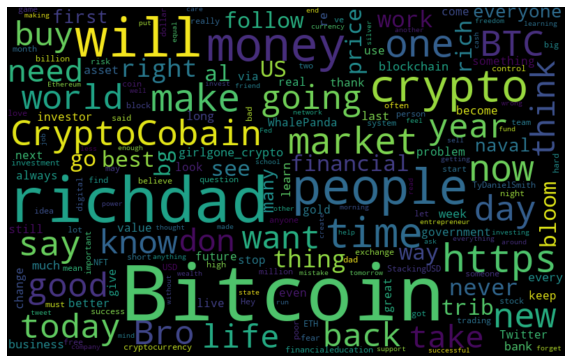

In [33]:
plt.figure(figsize=(10, 7))
plt.imshow(tw_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenization to create a new view

Tokenization with white spaces

In [34]:
all_phases = [tweet for tweet in df_tweets['Tweet']]
agg_phases = ' '.join(all_phases)

In [35]:
tokenizer_white_spaces = tokenize.WhitespaceTokenizer()
tokenized_phases = tokenizer_white_spaces.tokenize(agg_phases)
frequency = nltk.FreqDist(tokenized_phases)

## Creating a DataFrame to analyse the frequency

In [36]:
df_tw_words_frequency = pd.DataFrame(
    {
        'Words': list(frequency.keys()),
        'Frequency': list(frequency.values())
    }
)


In [37]:
df_tw_words_frequency.head()

,Words,Frequency
0,Do,488
1,you,14732
2,think,1489
3,#bitcoin,948
4,will,5338


In [38]:
top_10_frequent_words = df_tw_words_frequency.nlargest(columns='Frequency', n=10)
top_10_frequent_words

,Words,Frequency
26,the,36234
51,to,30322
37,a,21770
64,is,20148
79,of,18725
43,and,18019
1,you,14732
36,in,13415
28,for,10558
155,I,9267


View of the top 10 most frequent words

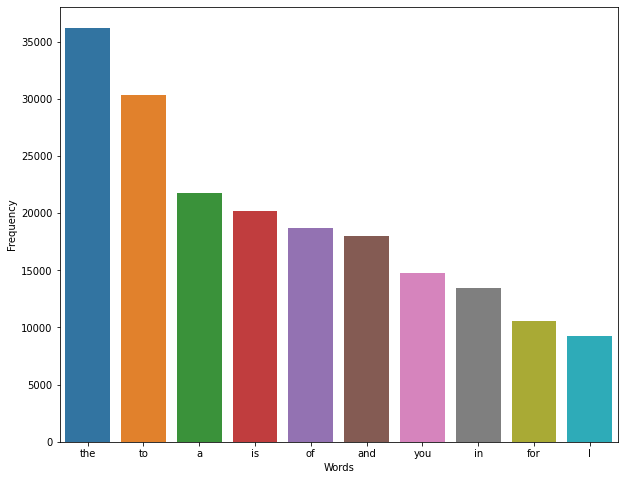

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_frequent_words, x='Words', y='Frequency')
plt.show()

This words doesn't add up to our analysis, will be necessary to clean some of this words before start the sentiment analysis

# Tweets column optimization pipeline

## Functions to help the visualization

Functioin to plot a word cloud

In [40]:
def word_cloud_tweets(text, column_text):
  all_phrase = [tweet for tweet in text[column_text]]
  agg_phrase = ' '.join(all_phrase)
  tw_wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(agg_phases)
  plt.figure(figsize=(10, 7))

  plt.imshow(tw_wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


Function to plot of the top 10 most frequent words

In [41]:
def top_most_frequent(text, column_text, length, title):
  all_phases = [tweet for tweet in text[column_text]]
  agg_phases = ' '.join(all_phases)
  tokenizer_white_spaces = tokenize.WhitespaceTokenizer()
  tokenized_phases = tokenizer_white_spaces.tokenize(agg_phases)
  frequency = nltk.FreqDist(tokenized_phases)
  df_tw_words_frequency = pd.DataFrame(
      {
          'Words': list(frequency.keys()),
          'Frequency': list(frequency.values())
      }
  )
  top_10_frequent_words = df_tw_words_frequency.nlargest(columns='Frequency', n=length)

  plt.figure(figsize=(10,8))
  plt.title(title)
  sns.barplot(data=top_10_frequent_words, x='Words', y='Frequency')
  plt.show()

## Data processing 1

To remove some of this words, will be used the stopwords from nltk library

In [42]:
initial_stopwords = nltk.corpus.stopwords.words("english")
initial_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
processed_phrase = list()

for tweet in df_tweets['Tweet']:
  new_phrase = list()
  words_txt = tokenizer_white_spaces.tokenize(tweet)
  for word in words_txt:
    if word not in initial_stopwords:
      new_phrase.append(word)
  processed_phrase.append(' '.join(new_phrase))
df_tweets['Data_processing_1'] = processed_phrase

In [44]:
df_tweets['Data_processing_1']

0        Do think #bitcoin reach $500K, $288K (S2FX mod...
1        Do think #bitcoin reach $500K, $288K (S2FX mod...
2                                                      43k
3        Do think #bitcoin reach $500K, $288K (S2FX mod...
4        So $64K top cycle (halving 2020-2024)? Or .. m...
                               ...                        
64940            And started... #tedxtearo nice work guys!
64941    On knowledge: Circa 1400 book cost price viney...
64942    Opened new MacBook Pro 13 Unibody. Wow, engine...
64943    GMail Tip: discovered drag labels left directl...
64944    Giving TweetDeck go... camper... Out running e...
Name: Data_processing_1, Length: 64945, dtype: object

Word Cloud View

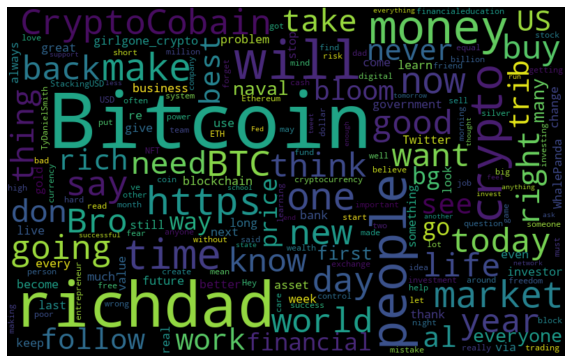

In [45]:
word_cloud_tweets(df_tweets, 'Data_processing_1')

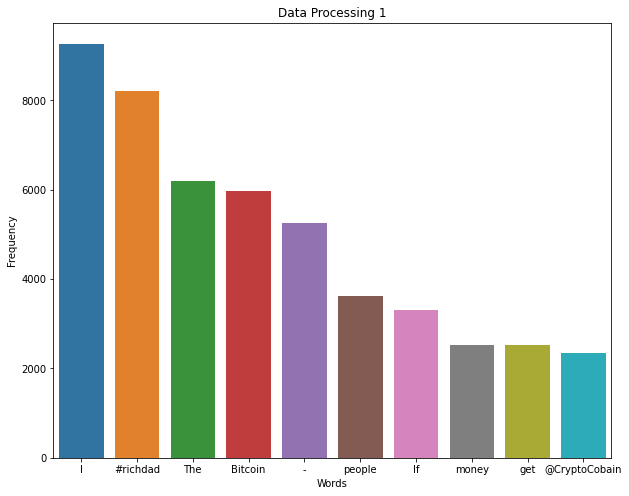

In [46]:
top_most_frequent(df_tweets, 'Data_processing_1', 10, 'Data Processing 1')


Comparation: Original x Data Processing 1

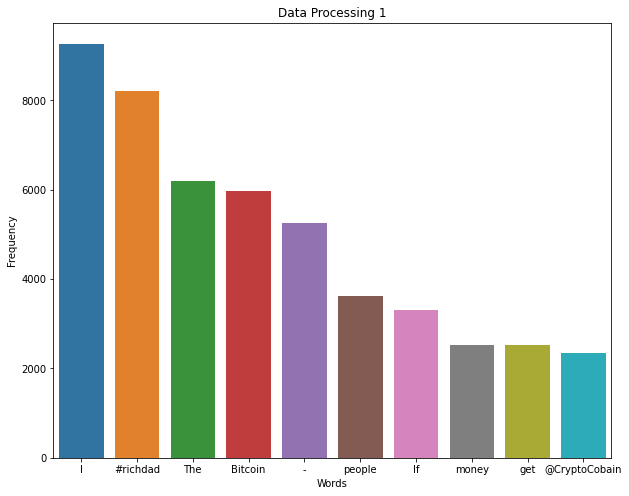

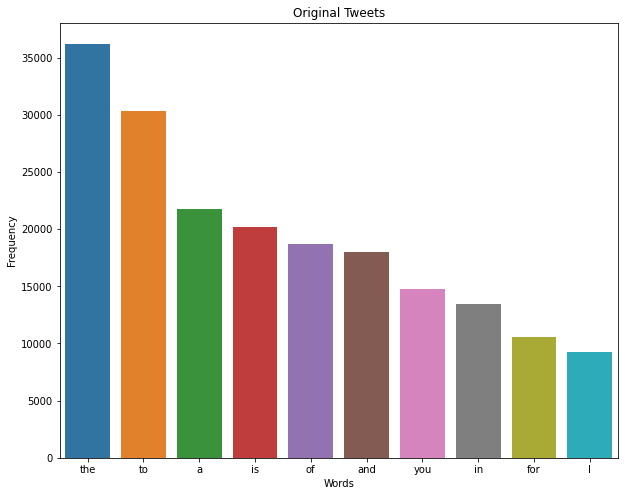

In [47]:
top_most_frequent(df_tweets, 'Data_processing_1', 10, 'Data Processing 1')

top_most_frequent(df_tweets, 'Tweet', 10, 'Original Tweets')


## Data processing 2

Optimizing the tokenization

In [48]:
tokenizer_punctuation = tokenize.WordPunctTokenizer()
tokenized_phases = tokenizer_punctuation.tokenize(agg_phases)

New stopwords with the punctuations

In [65]:
punctuation_sw = [element for element in punctuation]

In [58]:
stopwords_and_punctuation = initial_stopwords + punctuation_sw
stopwords_and_punctuation.append('://')

In [60]:
processed_phrase = list()

for tweet in df_tweets['Data_processing_1']:
  new_phrase = list()
  words_txt = tokenizer_punctuation.tokenize(tweet)
  for word in words_txt:
    if word not in stopwords_and_punctuation:
      new_phrase.append(word)
  processed_phrase.append(' '.join(new_phrase))
df_tweets['Data_processing_2'] = processed_phrase

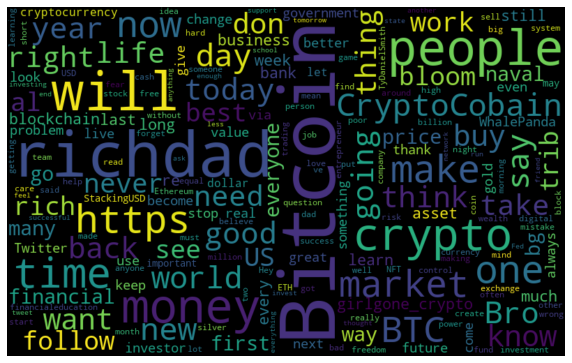

In [61]:
word_cloud_tweets(df_tweets, 'Data_processing_2')

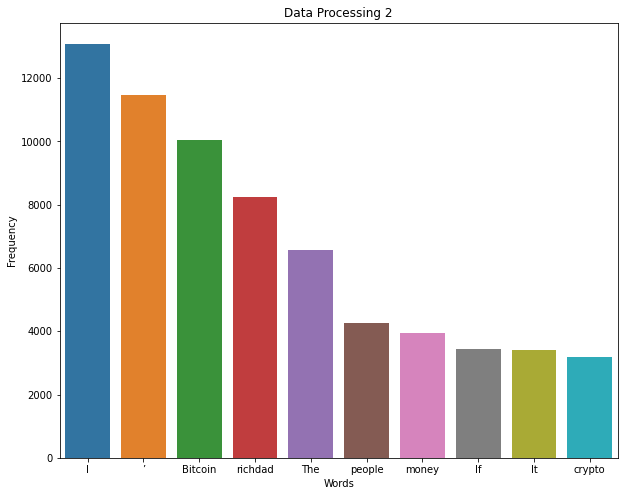

In [62]:
top_most_frequent(df_tweets, 'Data_processing_2', 10, 'Data Processing 2')

## Data processing 3

In [76]:
stopwords_no_unicode =  [unidecode.unidecode(text) for text in stopwords_and_punctuation]

In [77]:
processed_phrase = list()

for tweet in df_tweets['Data_processing_2']:
  new_phrase = list()
  words_txt = tokenizer_punctuation.tokenize(tweet)
  for word in words_txt:
    if word not in stopwords_no_unicode:
      new_phrase.append(word)
  processed_phrase.append(' '.join(new_phrase))
df_tweets['Data_processing_3'] = processed_phrase

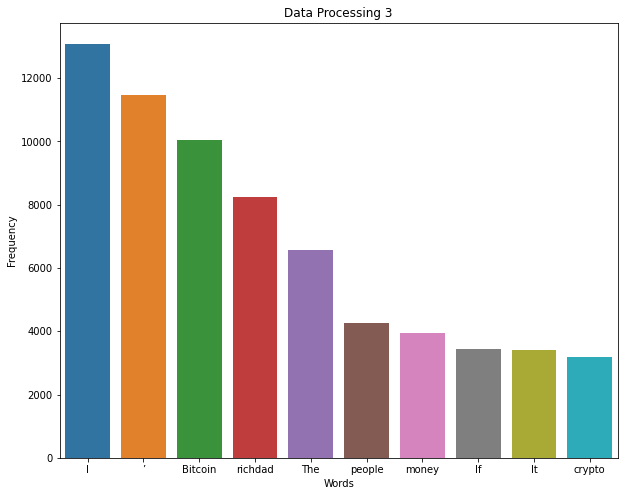

In [78]:
top_most_frequent(df_tweets, 'Data_processing_3', 10, 'Data Processing 3')

## Data processing 4

In [79]:
processed_phrase = list()

for tweet in df_tweets['Data_processing_3']:
  new_phrase = list()
  tweet = tweet.lower()
  words_txt = tokenizer_punctuation.tokenize(tweet)
  for word in words_txt:
    if word not in stopwords_no_unicode:
      new_phrase.append(word)
  processed_phrase.append(' '.join(new_phrase))
df_tweets['Data_processing_4'] = processed_phrase

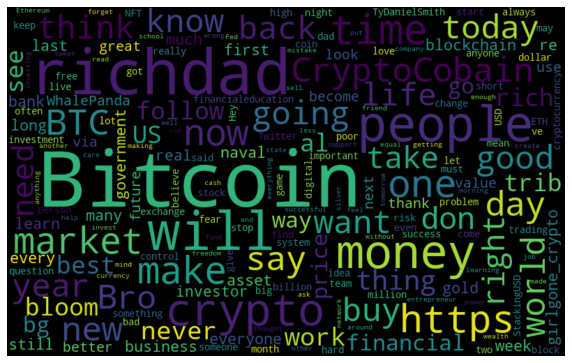

In [81]:
word_cloud_tweets(df_tweets, 'Data_processing_4')

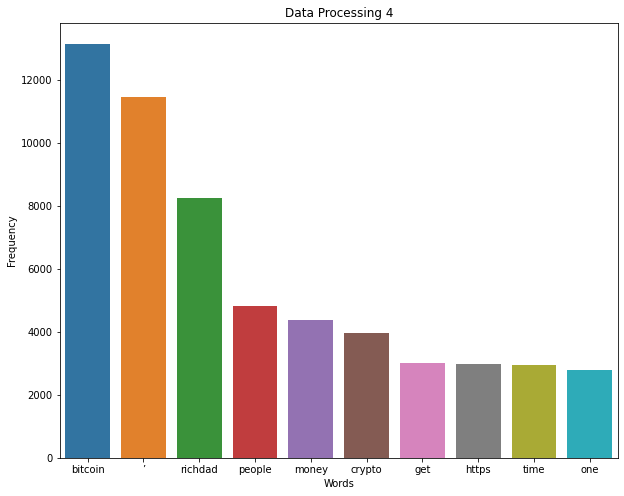

In [80]:
top_most_frequent(df_tweets, 'Data_processing_4', 10, 'Data Processing 4')

# Development of Sentiment Analysis

## Bag of Words


### Creating a vectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=50)

In [ ]:
bag_of_words = vectorizer.fit_transform(
    df_tweets['Tweet']
)

In [ ]:
bag_of_words.shape

### Bag of words return a sparse matrix

In [ ]:
sparse_matrix =  pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vectorizer.get_feature_names()
)

In [ ]:
sparse_matrix